In [1]:
import MGEmu as mgemu
import matplotlib.pyplot as plt
import numpy as np

/Users/s2265800/miniforge3/envs/mgl_ccl_cloe_env/lib/python3.11/site-packages/MGEmu

 As it is the first instance of the emulator, we need to download some data, it can take a few seconds...




Downloading...
From: https://drive.google.com/uc?id=1V2kiPa9pUAZv_SEB0lWBajIkVfgzvide
To: /Users/s2265800/miniforge3/envs/mgl_ccl_cloe_env/lib/python3.11/site-packages/MGEmu/models_v2.zip
100%|██████████| 18.3M/18.3M [00:02<00:00, 6.87MB/s]


Download finished. Extracting files.
Done.



In [2]:
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('font',size=20)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('lines', linewidth=3)
plt.rc('lines', markersize=6)
plt.rc('legend', fontsize=14)

## Parameter ranges for fr emulator 
| parameter         | limits                |
| :---:             | :---:                 |
| Omega_m           | [0.24, 0.35]          |
| Omega_b           | [0.04, 0.06]          |
| H0                | [63, 75]              |
| ns                | [0.9, 1.01]           |
| Omega_nu          | [0., 0.00317]         |
| As                | [1.7,2.5]*10^{-9}     |
| fr0               | [10^{-10},10^{-4}].   |
| z                 | [0.0, 2.]             |
| k [h/Mpc]         | [0.01, 3]             |


## Parameter ranges for dgp emulator 
| parameter         | limits                |
| :---:             | :---:                 |
| Omega_m           | [0.29, 0.34]          |
| Omega_b           | [0.04, 0.06]          |
| H0                | [63, 73]              |
| ns                | [0.94, 0.99]           |
| Omega_nu          | [0., 0.00317]         |
| As                | [1.5, 2.7]*10^{-9}     |
| omega_rc           | [0.001, 100]   |
| z                 | [0.0, 2.4]             |
| k [h/Mpc]         | [0.01, 5]             |

## Parameter ranges for gamma emulator 
| parameter         | limits                |
| :---:             | :---:                 |
| Omega_m           | [0.29, 0.34]          |
| Omega_b           | [0.04, 0.06]          |
| H0                | [63, 73]              |
| ns                | [0.94, 0.99]           |
| Omega_nu          | [0., 0.00317]         |
| As                | [1.5, 2.7]*10^{-9}     |
| gamma           | [0, 1]   |
| q1           | [-5, 5]   |
| z                 | [0.0, 2.4]             |
| k [h/Mpc]         | [0.01, 5]             |


## Parameter ranges for musigma-de emulator 
| parameter         | limits                |
| :---:             | :---:                 |
| Omega_cdm           | [0.2, 0.6]          |
| Omega_b           | [0.03, 0.07]          |
| H0                | [58, 80]              |
| ns                | [0.93, 1.]           |
| Omega_nu          | [0., 0.00317]         |
| As                | [0.5, 5]*10^{-9}     |
| mu0           | [-0.99, 3.]   |
| sigma0           | [-1., 3.]   |
| q1           | [-2, 2]   |
| z                 | [0.0, 2.4]             |
| k [h/Mpc]         | [0.01, 10]             |




## Calculate the boost for LCDM as MG limit

In [3]:
params = {
    # cosmology
    'Omega_m'     :  [0.315, 0.315],
    'Omega_b'  :  [0.05, 0.05],
    'ns'            :  [0.96, 0.96],
    'H0'        :  [67, 67],
    'As'            :  [2.0e-9,2.0e-9],
    # massive neutrino (WARNING: include neutrinos in the boost 
    # not in LCDM nonlinear power spectrum to avoid double-counting!!!)
    'Omega_nu' :  [0.0, 0.0],
    # f(R) gravity
    'fR0'            :  [1e-10,1e-10], # 'fr0' in MGrowth, 'fR0' in MGEmus v0.1
    # nDGP
    'omegarc'            :  [0.0, 0.0], #'omega_rc' in MGrowth, 'omegarc' in MGEmus v0.1
     # growth index parametrisation
    'gamma'            :  [0.55,0.55], #'gamma0' in MGrowth, 'gamma' in MGEmus v0.1
    # mu-Sigma with dark energy time-parametrisation
    'mu0'            :  [0., 0.], #'mu0' in MGrowth
    'sigma0'            :  [0., 0.], #'sigma0' in MGrowth
    # screening parameter for 'fr' and 'musigma-de
    'q1'            :  [0.0, 0.0],
    # redshift
    'z'             :  [0., 1.]
}

#available emulators: fr, dgp, gamma 
models = ['fr', 'dgp', 'gamma' , 'musigma-de']
boosts = {}
for model in models:
    emulator = mgemu.MG_boost(model=model)
    kvals, boost_nl = emulator.get_nonlinear_boost(**params)
    boosts[model] = {'boost_nl': boost_nl, 'kvals': kvals}

Loading nonlinear emulator...
Nonlinear emulator loaded in memory.
parameters used in emulator training:  ListWrapper(['Omega_m', 'Omega_b', 'Omega_nu', 'H0', 'ns', 'As', 'fR0', 'z'])
Loading nonlinear emulator...


/Users/s2265800/miniforge3/envs/mgl_ccl_cloe_env/lib/python3.11/site-packages/cosmopower/cosmopower_NN.py:378: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])


Nonlinear emulator loaded in memory.
parameters used in emulator training:  ListWrapper(['Omega_m', 'Omega_b', 'Omega_nu', 'H0', 'ns', 'As', 'omegarc', 'z'])
Loading nonlinear emulator...
Nonlinear emulator loaded in memory.
parameters used in emulator training:  ListWrapper(['Omega_m', 'Omega_b', 'Omega_nu', 'H0', 'ns', 'As', 'gamma', 'q1', 'z'])
Loading nonlinear boost and linear emulators...
Nonlinear and linear emulators loaded in memory.
parameters used in emulator training:  ['Omega_m', 'Omega_b', 'Omega_nu', 'H0', 'ns', 'As', 'mu0', 'q1', 'z', 'sigma0']


/var/folders/h4/nm88s1d55cb19yw7pxm0tzs40000gn/T/ipykernel_65491/2610867527.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(title='$z=1$', loc='lower left')


(0.95, 1.05)

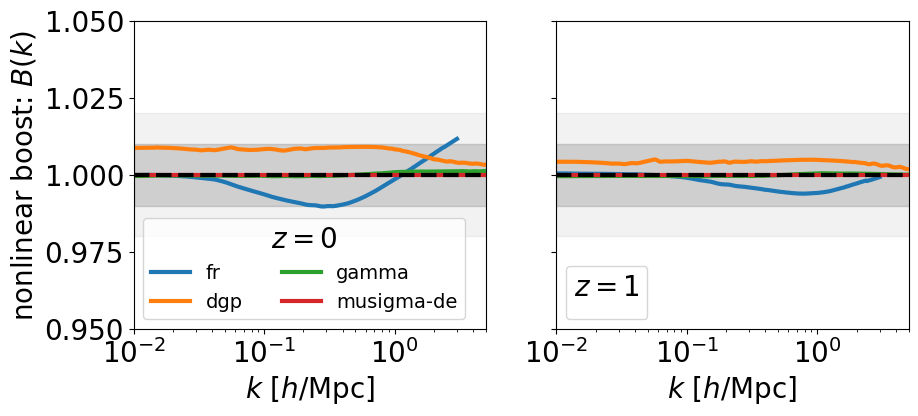

In [4]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharey=True)
for model in models:
    for i in range(len(params['z'])):
        kvals = boosts[model]['kvals']
        boost_nl = boosts[model]['boost_nl']
        ax[i].semilogx(kvals, boost_nl[i], label=model if i==0 else "")
        if model==models[-1]:
            ax[i].set_xlabel("$k$ [$h$/Mpc]")
            ax[i].fill_between(kvals, 0.99*np.ones(len(kvals)), 1.01*np.ones(len(kvals)), alpha=0.3, color='grey')
            ax[i].fill_between(kvals, 0.98*np.ones(len(kvals)), 1.02*np.ones(len(kvals)), alpha=0.1, color='grey')
            ax[i].axhline(1., linestyle='--', color='k')
            ax[i].set_xlim(0.01, 5.)
ax[0].legend(title='$z=0$', loc='lower left', ncol=2)
ax[1].legend(title='$z=1$', loc='lower left')
ax[0].set_ylabel("nonlinear boost: $B(k)$")
ax[0].set_ylim(0.95, 1.05)

## Calculate the boost for MG strongest deviation

In [5]:
params = {
    # cosmology
    'Omega_m'     :  [0.315, 0.315],
    'Omega_b'  :  [0.05, 0.05],
    'ns'            :  [0.96, 0.96],
    'H0'        :  [67, 67],
    'As'            :  [2.0e-9,2.0e-9],
    # massive neutrino (WARNING: include neutrinos in the boost 
    # not in LCDM nonlinear power spectrum to avoid double-counting!!!)
    'Omega_nu' :  [0.0, 0.0],
    # f(R) gravity
    'fR0'            :  [1e-4,1e-4], # 'fr0' in MGrowth
    # nDGP
    'omegarc'            :  [100., 100.], #'omega_rc' in MGrowth
    # growth index parametrisation
    'gamma'            :  [1., 1.], #'gamma0' in MGrowth
    # mu-Sigma with dark energy time-parametrisation
    'mu0'            :  [2., 2.], #'mu0' in MGrowth
    'sigma0'            :  [2., 2.], #'sigma0' in MGrowth
    # screening parameter for 'fr' and 'musigma-de
    'q1'            :  [0.6, 0.6],
    # redshift
    'z'             :  [0., 1.]
}

#available emulators: fr, dgp, gamma 
models = ['fr', 'dgp', 'gamma' , 'musigma-de']
boosts = {}
for model in models:
    emulator = mgemu.MG_boost(model=model)
    kvals, boost_nl = emulator.get_nonlinear_boost(**params)
    boosts[model] = {'boost_nl': boost_nl, 'kvals': kvals}

Loading nonlinear emulator...
Nonlinear emulator loaded in memory.
parameters used in emulator training:  ListWrapper(['Omega_m', 'Omega_b', 'Omega_nu', 'H0', 'ns', 'As', 'fR0', 'z'])
Loading nonlinear emulator...
Nonlinear emulator loaded in memory.
parameters used in emulator training:  ListWrapper(['Omega_m', 'Omega_b', 'Omega_nu', 'H0', 'ns', 'As', 'omegarc', 'z'])
Loading nonlinear emulator...
Nonlinear emulator loaded in memory.
parameters used in emulator training:  ListWrapper(['Omega_m', 'Omega_b', 'Omega_nu', 'H0', 'ns', 'As', 'gamma', 'q1', 'z'])
Loading nonlinear boost and linear emulators...
Nonlinear and linear emulators loaded in memory.
parameters used in emulator training:  ['Omega_m', 'Omega_b', 'Omega_nu', 'H0', 'ns', 'As', 'mu0', 'q1', 'z', 'sigma0']


/var/folders/h4/nm88s1d55cb19yw7pxm0tzs40000gn/T/ipykernel_65491/3625853717.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(title='$z=1$', loc='upper right')


(0.6, 4.0)

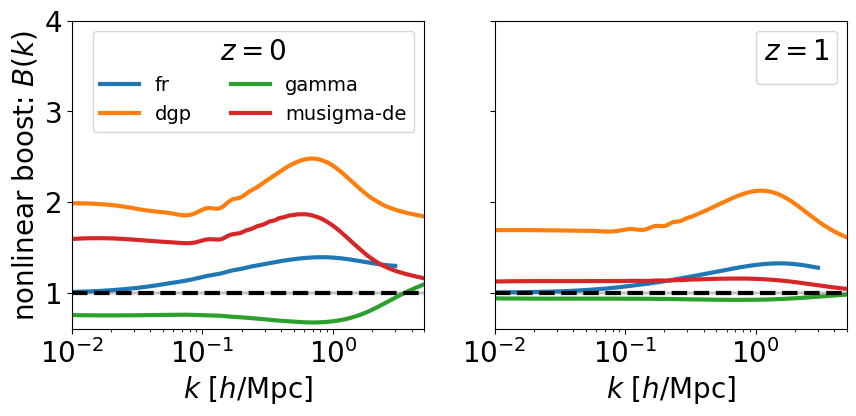

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharey=True)
for model in models:
    for i in range(len(params['z'])):
        kvals = boosts[model]['kvals']
        boost_nl = boosts[model]['boost_nl']
        ax[i].semilogx(kvals, boost_nl[i], label=model if i==0 else "")
        if model==models[-1]:
            ax[i].set_xlabel("$k$ [$h$/Mpc]")
            ax[i].fill_between(kvals, 0.99*np.ones(len(kvals)), 1.01*np.ones(len(kvals)), alpha=0.3, color='grey')
            ax[i].fill_between(kvals, 0.98*np.ones(len(kvals)), 1.02*np.ones(len(kvals)), alpha=0.1, color='grey')
            ax[i].axhline(1., linestyle='--', color='k')
            ax[i].set_xlim(0.01, 5.)
ax[0].legend(title='$z=0$', loc='upper right', ncol=2)
ax[1].legend(title='$z=1$', loc='upper right')
ax[0].set_ylabel("nonlinear boost: $B(k)$")
ax[0].set_ylim(0.6, 4.)